Saving Style Image.jpg to Style Image (2).jpg
Saving Content Image.jpg to Content Image (2).jpg
Enter content image filename (e.g., photo.jpg): Content Image.jpg
Enter style image filename (e.g., painting.jpg): Style Image.jpg


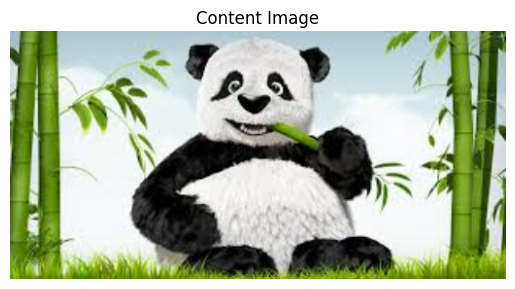

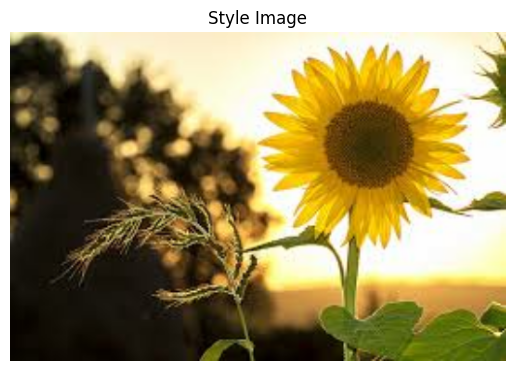

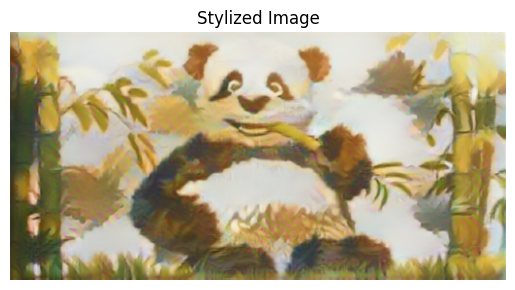

Image saved as stylized_output.jpg


In [3]:
# Step 1: Install required libraries (if not already available)
!pip install tensorflow tensorflow_hub matplotlib

# Step 2: Import libraries
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import PIL.Image
import numpy as np

# Step 3: Load and preprocess images
def load_image(path_to_img, max_dim=512):
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    scale = max_dim / max(shape)
    new_shape = tf.cast(shape * scale, tf.int32)

    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img

def show_image(image, title=''):
    image = image[0]
    plt.imshow(image)
    plt.axis('off')
    plt.title(title)
    plt.show()

# Step 4: Upload your content and style images
from google.colab import files
uploaded = files.upload()

# Enter the filenames
content_image_path = input("Enter content image filename (e.g., photo.jpg): ")
style_image_path = input("Enter style image filename (e.g., painting.jpg): ")

content_image = load_image(content_image_path)
style_image = load_image(style_image_path)

show_image(content_image, 'Content Image')
show_image(style_image, 'Style Image')

# Step 5: Load pre-trained NST model from TensorFlow Hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# Step 6: Stylize the image
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]

# Step 7: Show and save the result
show_image(stylized_image, 'Stylized Image')

# Save image
def tensor_to_image(tensor):
    tensor = tensor * 255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor) > 3:
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

output_img = tensor_to_image(stylized_image)
output_img.save("stylized_output.jpg")
print("Image saved as stylized_output.jpg")


In [4]:
# Download the image
from google.colab import files
files.download("stylized_output.jpg")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>